<a href="https://colab.research.google.com/github/mobarakol/computer_vision_tutorial/blob/main/triangulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Triangulation:
We generate random points in the 3D space and project them into two test views. Then, we add noise to those observations and reconstruct points back in 3D using the OpenCV function cv2.triangulatePoints. As input, the function takes observations from two cameras and camera projection matrices (projective mapping from the world coordinate frame to a view coordinate frame) for each view. It returns the reconstructed points in the world coordinate frame.

Original points:
[[-1.182138   -0.20755999  1.0511695 ]
 [ 0.11059172  2.1842115  -1.377336  ]
 [-0.5515492   2.2292726  -0.16705102]
 [ 1.4889408  -0.5552292  -1.7100073 ]
 [-0.77304363  0.51170343 -1.6521558 ]]
Reconstructed points:
[[-0.9831825  -0.14126502  0.92417157]
 [ 0.11587542  2.9424622  -1.7039161 ]
 [-0.5705934   2.3026478  -0.17226858]
 [ 1.3978546  -0.5063771  -1.7198946 ]
 [-1.0442044   0.64513135 -2.0447361 ]]


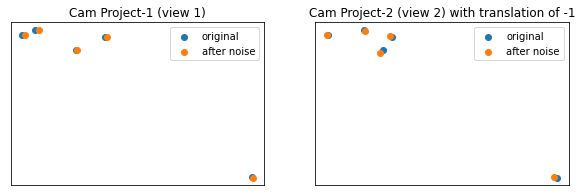

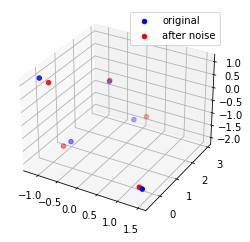

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Generate the test camera's projection matrices:
P1 = np.eye(3, 4, dtype=np.float32)
P2 = np.eye(3, 4, dtype=np.float32)
P2[0, 3] = -1

#Generate 5 test points in the 3D space:
N = 5
points3d = np.empty((4, N), np.float32)
points3d[:3, :] = np.random.randn(3, N)
points3d[3, :] = 1

#Project the 3D points into two views and add noise:
#view1:
points1 = P1 @ points3d
points1 = points1[:2, :] / points1[2, :]
points1_orig = np.copy(points1)
points1[:2, :] += np.random.randn(2, N) * 9*1e-2

#view2 with the translation of -1:
points2 = P2 @ points3d
points2 = points2[:2, :] / points2[2, :]
points2_orig = np.copy(points2)
points2[:2, :] += np.random.randn(2, N) * 9*1e-2

#Reconstruct the points from noisy observations:
points3d_reconstr = cv2.triangulatePoints(P1, P2, points1, points2)
points3d_reconstr /= points3d_reconstr[3, :]

#outcome
num_img = 2
fig, ax = plt.subplots(1, num_img, figsize=(5*num_img,3), subplot_kw=dict(xticks=[],yticks=[]))
ax[0].scatter(points1_orig[0], points1_orig[1], label='original')
ax[0].scatter(points1[0], points1[1], label='after noise')
ax[0].legend()
ax[0].set_title('Cam Project-1 (view 1)')

ax[1].scatter(points2_orig[0], points2_orig[1], label='original')
ax[1].scatter(points2[0], points2[1], label='after noise')
ax[1].legend()
ax[1].set_title('Cam Project-2 (view 2) with translation of -1')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(points3d[:3].T[:,0], points3d[:3].T[:,1], points3d[:3].T[:,2], color='b', label='original')
ax.scatter(points3d_reconstr[:3].T[:,0], points3d_reconstr[:3].T[:,1], points3d_reconstr[:3].T[:,2], color='r', label='after noise')
ax.legend()

print('Original points:')
print(points3d[:3].T)
print('Reconstructed points:')
print(points3d_reconstr[:3].T)